# Spotify Music Data
This dataset consists of ~600 songs that were in the top songs of the year from 2010 to 2019 (as measured by Billboard). You can explore interesting song data pulled from [Spotify](http://organizeyourmusic.playlistmachinery.com/#) such as the beats per minute, amount of spoken words, loudness, and energy of every song. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

In [3]:
import pandas as pd

df = pd.read_csv("spotify_top_music.csv", index_col=0)

In [4]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [6]:
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


## Data dictionary

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | title      | The title of the song                                      |
|  1 | artist     | The artist of the song                                     |
|  2 | top genre  | The genre of the song                                      |
|  3 | year       | The year the song was in the Billboard                     |
|  4 | bpm        | Beats per minute: the tempo of the song                    |
|  5 | nrgy       | The energy of the song: higher values mean more energetic (fast, loud)  |
|  6 | dnce       | The danceability of the song: higher values mean it's easier to dance to  |
|  7 | dB         | Decibel: the loudness of the song  |
|  8 | live       | Liveness: likeliness the song was recorded with a live audience  |
|  9 | val        | Valence: higher values mean a more positive sound (happy, cheerful) |
| 10 | dur        | The duration of the song |
| 11 | acous      | The acousticness of the song: likeliness the song is acoustic|
| 12 | spch       | Speechines: higher values mean more spoken words |
| 13 | pop        | Popularity: higher values mean more popular|

[Source](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) of dataset.

## Don't know where to start? 

**Challenges are brief tasks**

- 🗺️ **Explore**: Which artists and genres are the most popular?
- 📊 **Visualize**: Visualize the numeric values as a time-series by year. Can you spot any changes over the years?
- 🔎 **Analyze**: Train and build a classifier to predict a song's genre based on columns 3 to 13.


In [7]:
pop_artists = df[df['pop'] > 76][['artist','top genre','pop']]
pop_artists.sort_values(['pop'],ascending=False)

,artist,top genre,pop
573,Maroon 5,pop,99
574,Selena Gomez,dance pop,97
575,Lewis Capaldi,pop,96
576,Shawn Mendes,canadian pop,95
577,Sam Smith,pop,93
...,...,...,...
532,Justin Bieber,canadian pop,77
286,Calvin Harris,dance pop,77
287,Zara Larsson,dance pop,77
384,Little Mix,dance pop,77


In [8]:
cols = list(df.columns[df.dtypes == int])
cols

['year',
 'bpm',
 'nrgy',
 'dnce',
 'dB',
 'live',
 'val',
 'dur',
 'acous',
 'spch',
 'pop']

In [9]:
yearly = df[cols].groupby('year').agg('mean')
yearly

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,,,,,,,,,,
2010,122.058824,77.901961,64.529412,-4.901961,21.176471,57.000000,229.803922,11.627451,8.882353,64.254902
2011,119.075472,74.886792,63.641509,-5.018868,20.943396,53.698113,242.566038,13.339623,9.660377,61.867925
2012,121.085714,75.485714,65.714286,-4.857143,15.828571,64.171429,224.400000,4.857143,5.800000,67.771429
2013,121.676056,73.873239,62.042254,-5.140845,19.718310,53.183099,234.492958,10.323944,8.309859,63.985915
2014,123.000000,67.775862,62.534483,-5.775862,17.293103,52.086207,224.155172,17.551724,8.672414,62.706897
2015,119.768421,70.336842,63.663158,-5.621053,18.305263,52.526316,223.368421,16.600000,7.052632,64.568421
2016,114.325000,67.237500,63.325000,-6.712500,17.737500,45.150000,220.225000,15.875000,8.362500,64.162500
2017,116.800000,69.169231,65.369231,-5.615385,15.369231,52.276923,222.169231,16.600000,9.784615,69.015385
2018,114.593750,65.468750,67.203125,-5.671875,14.750000,48.765625,217.187500,12.781250,8.625000,72.437500


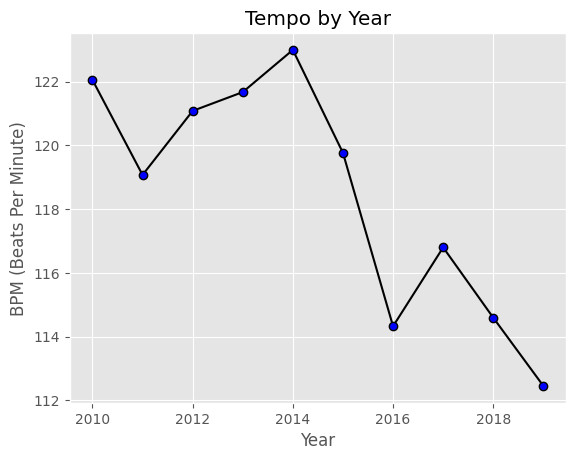

In [11]:
plt.plot(yearly.index,yearly['bpm'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Tempo by Year')
plt.ylabel('BPM (Beats Per Minute)')
plt.xlabel('Year')
plt.show()

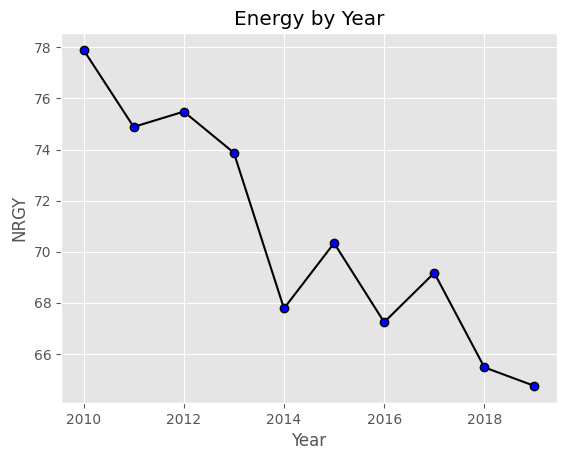

In [13]:
plt.plot(yearly.index,yearly['nrgy'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Energy by Year')
plt.xlabel('Year')
plt.ylabel('NRGY')
plt.show()

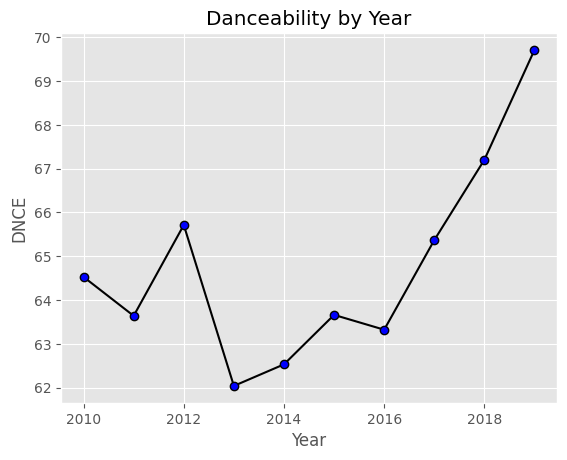

In [14]:
plt.plot(yearly.index,yearly['dnce'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Danceability by Year')
plt.xlabel('Year')
plt.ylabel('DNCE')
plt.show()

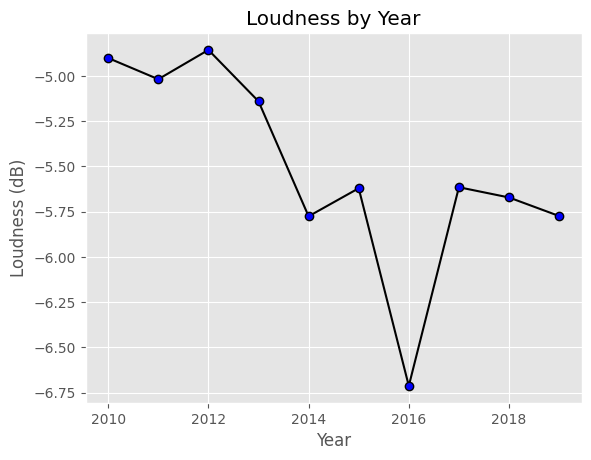

In [15]:
plt.plot(yearly.index,yearly['dB'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Loudness by Year')
plt.xlabel('Year')
plt.ylabel('Loudness (dB)')
plt.show()

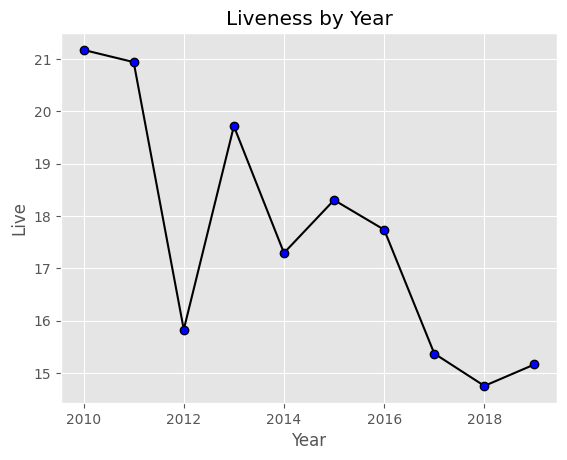

In [16]:
plt.plot(yearly.index,yearly['live'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Liveness by Year')
plt.xlabel('Year')
plt.ylabel('Live')
plt.show()

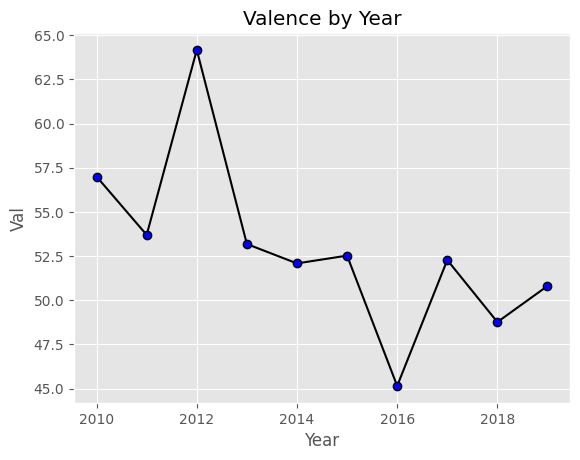

In [17]:
plt.plot(yearly.index,yearly['val'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Valence by Year')
plt.xlabel('Year')
plt.ylabel('Val')
plt.show()

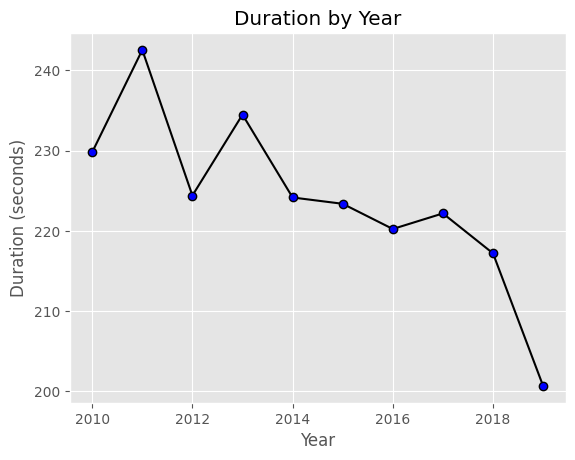

In [18]:
plt.plot(yearly.index,yearly['dur'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Duration by Year')
plt.xlabel('Year')
plt.ylabel('Duration (seconds)')
plt.show()

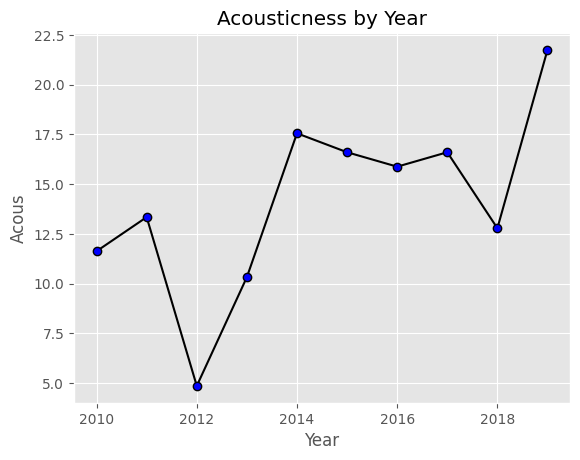

In [19]:
plt.plot(yearly.index,yearly['acous'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Acousticness by Year')
plt.xlabel('Year')
plt.ylabel('Acous')
plt.show()

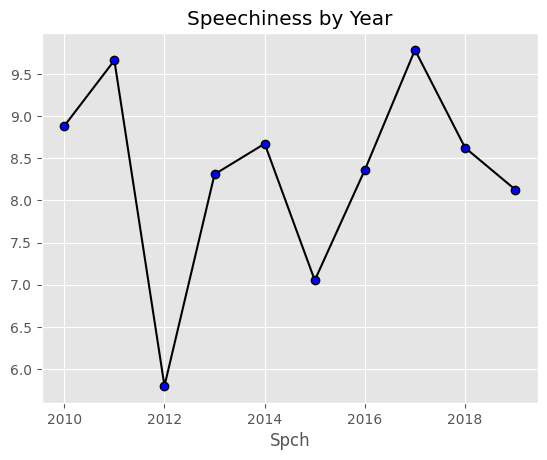

In [20]:
plt.plot(yearly.index,yearly['spch'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Speechiness by Year')
plt.xlabel('Year')
plt.xlabel('Spch')
plt.show()

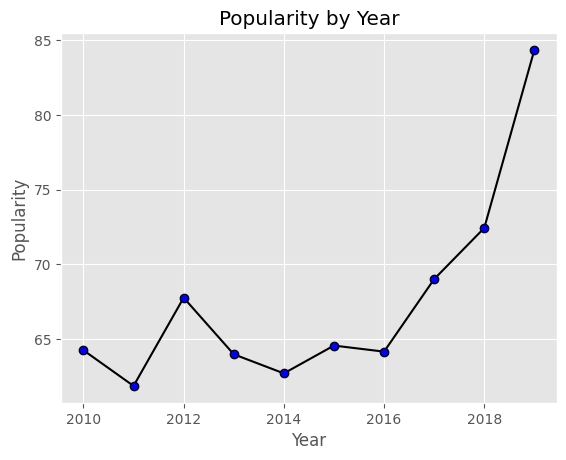

In [21]:
plt.plot(yearly.index,yearly['pop'], marker = 'o', mec = 'black',mfc = 'blue',c='black')
plt.title('Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

Machine Learning Classifier

In [27]:
X = df.iloc[:,3:14]
y = df['top genre']

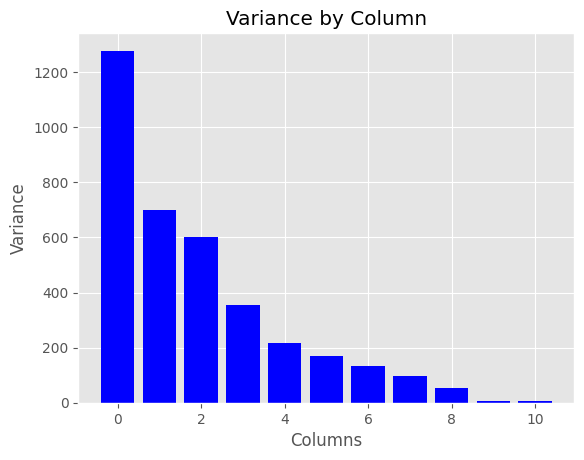

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
var = pca.explained_variance_
plt.bar(np.arange(0,11),var, color = 'Blue')
plt.title('Variance by Column')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.show()